In [115]:
# Import necessary libraries/modules
import vertica_python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [116]:
# Set up the Vertica Connection Information
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')

conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False
            }

connection = vertica_python.connect(**conn_info)
cur = connection.cursor('dict')

In [97]:
preprocess_query="""
-- Create Binary Columns for each subject within a course_id
DROP TABLE IF EXISTS tmp_course_subjects;
CREATE LOCAL TEMPORARY TABLE IF NOT EXISTS tmp_course_subjects ON COMMIT PRESERVE ROWS AS
SELECT	
	DISTINCT course_id,
	CASE 
		WHEN subject_title = 'Architecture' THEN 1
		ELSE 0
	END AS Architecture,
	CASE 
		WHEN subject_title = 'Art & Culture' THEN 1
		ELSE 0
	END AS ArtCulture,
	CASE 
		WHEN subject_title = 'Biology & Life Sciences' THEN 1
		ELSE 0
	END AS BiologyLifeSciences,
	CASE 
		WHEN subject_title = 'Business & Management' THEN 1
		ELSE 0
	END AS BusinessManagement,
	CASE 
		WHEN subject_title = 'Chemistry' THEN 1
		ELSE 0
	END AS Chemistry,
	CASE 
		WHEN subject_title = 'Communication' THEN 1
		ELSE 0
	END AS Communication,
	CASE 
		WHEN subject_title = 'Computer Science' THEN 1
		ELSE 0
	END AS ComputerScience,
	CASE 
		WHEN subject_title = 'Data Analysis & Statistics' THEN 1
		ELSE 0
	END AS DataAnalysisStatistics,
	CASE 
		WHEN subject_title = 'Design' THEN 1
		ELSE 0
	END AS Design,
	CASE 
		WHEN subject_title = 'Economics & Finance' THEN 1
		ELSE 0
	END AS EconomicsFinance,
	CASE 
		WHEN subject_title = 'Education & Teacher Training' THEN 1
		ELSE 0
	END AS EducationTeacherTraining,
	CASE 
		WHEN subject_title = 'Electronics' THEN 1
		ELSE 0
	END AS Electronics,
	CASE 
		WHEN subject_title = 'Energy & Earth Sciences' THEN 1
		ELSE 0
	END AS EnergyEarthSciences,
	CASE 
		WHEN subject_title = 'Engineering' THEN 1
		ELSE 0
	END AS Engineering,
	CASE 
		WHEN subject_title = 'Environmental Studies' THEN 1
		ELSE 0
	END AS EnvironmentalStudies,
	CASE 
		WHEN subject_title = 'Ethics' THEN 1
		ELSE 0
	END AS Ethics,
	CASE 
		WHEN subject_title = 'Food & Nutrition' THEN 1
		ELSE 0
	END AS FoodNutrition,
	CASE 
		WHEN subject_title = 'Health & Safety' THEN 1
		ELSE 0
	END AS HealthSafety,
	CASE 
		WHEN subject_title = 'History' THEN 1
		ELSE 0
	END AS History,
	CASE 
		WHEN subject_title = 'Humanities' THEN 1
		ELSE 0
	END AS Humanities,
		CASE 
		WHEN subject_title = 'Language' THEN 1
		ELSE 0
	END AS Languag,
		CASE 
		WHEN subject_title = 'Law' THEN 1
		ELSE 0
	END AS Law,
		CASE 
		WHEN subject_title = 'Literature' THEN 1
		ELSE 0
	END AS Literature,
		CASE 
		WHEN subject_title = 'Math' THEN 1
		ELSE 0
	END AS Math,
		CASE 
		WHEN subject_title = 'Medicine' THEN 1
		ELSE 0
	END AS Medicine,
		CASE 
		WHEN subject_title = 'Music' THEN 1
		ELSE 0
	END AS Music,
		CASE 
		WHEN subject_title = 'Philosophy & Ethics' THEN 1
		ELSE 0
	END AS PhilosophyEthics,
		CASE 
		WHEN subject_title = 'Physics' THEN 1
		ELSE 0
	END AS Physics,
		CASE 
		WHEN subject_title = 'Science' THEN 1
		ELSE 0
	END AS Science,
		CASE 
		WHEN subject_title = 'Social Sciences' THEN 1
		ELSE 0
	END AS SocialSciences
FROM
	production.d_course_subjects;
	
--Roll up the subjects at the course_id level
DROP TABLE IF EXISTS ed_services.course_subjects;	
CREATE TABLE IF NOT EXISTS ed_services.course_subjects AS
SELECT
	course_id,
	SUM(Architecture) AS Architecture,
	SUM(ArtCulture) AS ArtCulture,
	SUM(BiologyLifeSciences) AS BiologyLifeSciences,
	SUM(BusinessManagement) AS BusinessManagement,
	SUM(Chemistry) AS Chemistry,
	SUM(Communication) AS Communication,
	SUM(ComputerScience) AS ComputerScience,
	SUM(DataAnalysisStatistics) AS DataAnalysisStatistics,
	SUM(Design) AS Design,
	SUM(EconomicsFinance) AS EconomicsFinance,
	SUM(EducationTeacherTraining) AS EducationTeacherTraining,
	SUM(Electronics) AS Electronics,
	SUM(EnergyEarthSciences) AS EnergyEarthSciences,
	SUM(Engineering) AS Engineering,
	SUM(EnvironmentalStudies) AS EnvironmentalStudies,
	SUM(Ethics) AS Ethics,
	SUM(FoodNutrition) AS FoodNutrition,
	SUM(HealthSafety) AS HealthSafety,
	SUM(History) AS History,
	SUM(Humanities) AS Humanities,
	SUM(Languag) AS Languag,
	SUM(Law) AS Law,
	SUM(Literature) AS Literature,
	SUM(Math) AS Math,
	SUM(Medicine) AS Medicine,
	SUM(Music) AS Music,
	SUM(PhilosophyEthics) AS PhilosophyEthics,
	SUM(Physics) AS Physics,
	SUM(Science) AS Science,
	SUM(SocialSciences) AS SocialSciences,
	COUNT(*) AS cnt_subjects
FROM
	tmp_course_subjects
GROUP BY
	course_id;
    
--Create Binary columns for programs 
DROP TABLE IF EXISTS tmp_course_program;	
CREATE LOCAL TEMPORARY TABLE IF NOT EXISTS tmp_course_program ON COMMIT PRESERVE ROWS AS
SELECT
	course_id,
	CASE
		WHEN program_type = 'XSeries' THEN 1
		ELSE 0
	END AS XSeries,
	CASE
		WHEN program_type = 'Professional Certificate' THEN 1
		ELSE 0
	END AS ProfessionalCertificate,
	CASE
		WHEN program_type = 'MicroMasters' THEN 1
		ELSE 0
	END AS MicroMasters
FROM
	production.d_program_course;

--Sum up the programs columns and add column for non program courses
DROP TABLE IF EXISTS course_program;
CREATE LOCAL TEMPORARY TABLE IF NOT EXISTS course_program ON COMMIT PRESERVE ROWS AS
SELECT
	course_id,
	SUM(XSeries) AS XSeries,
	SUM(ProfessionalCertificate) AS ProfessionalCertificate,
	SUM(MicroMasters) AS MicroMasters
FROM
	tmp_course_program
GROUP BY
	course_id;  
	
--Roll up into a program summary table	
DROP TABLE IF EXISTS ed_services.course_program;
CREATE TABLE IF NOT EXISTS ed_services.course_program AS
SELECT
	a.course_id,
	ISNULL(XSeries, 0) AS XSeries,
	ISNULL(ProfessionalCertificate, 0) AS ProfessionalCertificate,
	ISNULL(MicroMasters, 0) AS MicroMasters,
	CASE
		WHEN XSeries IS NULL THEN 1
		ELSE 0
	END AS NonProgram
FROM
	business_intelligence.course_master a
LEFT JOIN
	course_program b
ON
	a.course_id = b.course_id;

--Create binary column for course track
DROP TABLE IF EXISTS tmp_course_track;	
CREATE LOCAL TEMPORARY TABLE IF NOT EXISTS tmp_course_track ON COMMIT PRESERVE ROWS AS	
SELECT
	course_id,
	CASE
		WHEN course_seat_type IN ('honor', 'audit') THEN 1
		ELSE 0
	END AS audit_track,
	CASE
		WHEN course_seat_type = 'verified' THEN 1
		ELSE 0
	END AS verified_track,
	CASE
		WHEN course_seat_type IN ('no-id-professional', 'professional') THEN 1
		ELSE 0
	END AS professional_track,
	CASE
		WHEN course_seat_type = 'credit' THEN 1
		ELSE 0
	END AS credit_track
FROM
	production.d_course_seat;
	
--Roll up of course tracks per course_id	
DROP TABLE IF EXISTS ed_services.course_track;
CREATE TABLE IF NOT EXISTS ed_services.course_track AS
SELECT
	course_id,
	SUM(audit_track) AS audit_track,
	SUM(verified_track) AS verified_track,
	SUM(professional_track) AS professional_track,
	SUM(credit_track) AS credit_track,
	COUNT(*) AS cnt_available_tracks
FROM
	tmp_course_track
GROUP BY
	course_id;
    
--Partner Rankings    
DROP TABLE IF EXISTS ed_services.partner_rankings;	
CREATE TABLE IF NOT EXISTS ed_services.partner_rankings AS
SELECT
	org_id,
	course_run_count,
	course_count,
	sum_partner_enrolls,
	sum_partner_vtr,
	sum_partner_bookings,
	ISNULL(sum_partner_enrolls/course_run_count, 0) AS enrollments_per_course_run,
	ISNULL(sum_partner_bookings/course_run_count, 0) AS bookings_per_course_run,
	ROW_NUMBER() OVER (ORDER BY sum_partner_enrolls DESC) AS enrollment_rank,
	ROW_NUMBER() OVER (ORDER BY ISNULL(sum_partner_bookings,0) DESC) AS bookings_rank,
	ROW_NUMBER() OVER (ORDER BY ISNULL(sum_partner_vtr, 0) DESC) AS vtr_rank,
	ROW_NUMBER() OVER (ORDER BY ISNULL(sum_partner_enrolls/course_run_count, 0) DESC) AS enrolls_per_course_rank,
	ROW_NUMBER() OVER (ORDER BY ISNULL(sum_partner_bookings/course_run_count, 0) DESC) AS bookings_per_course_rank
FROM
	business_intelligence.partner_stats_summary
WHERE
	org_id IS NOT NULL;
    
DROP TABLE IF EXISTS ed_services.pre_course_grouping;
CREATE TABLE IF NOT EXISTS ed_services.pre_course_grouping AS
SELECT
	course_id,
	CASE
		WHEN subject_title IN ('Architecture', 'Art & Culture', 'Design', 'Education & Teacher Training', 'Ethics', 'Food & Nutrition', 'Health & Safety', 'History', 'Humanities', 'Language', 'Law', 'Literature', 'Music', 'Philosophy & Ethics', 'Social Sciences') THEN 1
		ELSE 0
	END AS LiberalArts,
	CASE
		WHEN subject_title IN ('Biology & Life Sciences', 'Chemistry', 'Computer Science', 'Data Analysis & Statistics', 'Electronics', 'Energy & Earth Sciences', 'Engineering', 'Environmental Studies', 'Math', 'Medicine', 'Physics', 'Science') THEN 1
		ELSE 0
	END AS STEM,
	CASE
		WHEN subject_title IN ('Business & Management', 'Communication', 'Economics & Finance') THEN 1
		ELSE 0
	END AS Business
FROM
	production.d_course_subjects;
	
DROP TABLE IF EXISTS ed_services.tmp_pre_course_grouping;
CREATE TABLE IF NOT EXISTS ed_services.tmp_pre_course_grouping AS
SELECT
	course_id,
	SUM(LiberalArts) AS LiberalArts,
	SUM(STEM) AS STEM,
	SUM(Business) AS Business
FROM
	ed_services.pre_course_grouping
GROUP BY
	course_id;
	
DROP TABLE IF EXISTS ed_services.course_grouping;
CREATE TABLE IF NOT EXISTS ed_services.course_grouping AS
SELECT
	course_id,
	CASE
		WHEN LiberalArts > 0 THEN 1
		ELSE 0
	END AS LiberalArts,
	CASE
		WHEN STEM > 0 THEN 1
		ELSE 0
	END AS STEM,
	CASE
		WHEN Business > 0 THEN 1
		ELSE 0
	END AS Business
FROM
	ed_services.tmp_pre_course_grouping;
    
DROP TABLE IF EXISTS ed_services.registrations;
CREATE TABLE IF NOT EXISTS ed_services.registrations AS
SELECT
	YEAR(user_account_creation_time) AS yr,
	QUARTER(user_account_creation_time) AS qtr,
	MONTH(user_account_creation_time) AS mth,
	COUNT(*) AS registrations
FROM
	production.d_user
GROUP BY
	1,
	2,
	3;
    
DROP TABLE IF EXISTS ed_services.course_staff;
CREATE TABLE IF NOT EXISTS ed_services.course_staff AS
SELECT
	course_id,
	COUNT(DISTINCT a.user_id) AS TAs
FROM
	lms_read_replica.student_courseaccessrole a
LEFT JOIN
	production.d_user b
ON
	a.user_id = b.user_id
WHERE
	role IN ('instructor', 'staff')
AND
	user_email NOT LIKE '%edx.org'
GROUP BY
	course_id;
    
DROP TABLE IF EXISTS ed_services.course_time_enrolls;
CREATE TABLE IF NOT EXISTS ed_services.course_time_enrolls AS
SELECT
	DISTINCT a.course_id,
	cum_sum_enrolls AS enrollments_at_start
FROM
	business_intelligence.course_stats_time a
LEFT JOIN
	business_intelligence.course_master b
ON
	a.course_id = b.course_id
WHERE
	date = course_start_date;    
"""

# Execute the Query from above
cur.execute(preprocess_query)

In [117]:
query = """
SELECT
	a.course_id,
	cnt_subjects,
	LiberalArts,
	STEM,
	Business,
	is_WL,
	level_type,
	pacing_type,
	course_partner,
	CASE
		WHEN course_partner IN ('MITx', 'HarvardX', 'BerkeleyX', 'UTArlingtonX', 'UTAustinX', 'UTHealthSPHx', 'UTPermianBasin', 'UTSanAntonioX', 'UTMBx', 'UQx', 'DelftX') THEN 1 ELSE 0
	END AS trust_bar_tier_1,
	CASE
		WHEN course_partner IN ('BUx', 'SorbonneX', 'UBCx', 'USMx', 'GeorgetownX', 'AdelaideX') THEN 1 ELSE 0
	END AS trust_bar_tier_2,
	CASE
		WHEN course_partner IN ('RWTHx', 'ANUx') THEN 1 ELSE 0
	END AS trust_bar_tier_3,
	CASE
		WHEN course_partner IN ('MITx', 'HarvardX', 'BerkeleyX', 'CaltechX', 'OxfordX', 'ColumbiaX') THEN 1 ELSE 0
	END AS top_10_school,
	course_run_number,
	XSeries,
	ProfessionalCertificate,
	MicroMasters,
	NonProgram,
	audit_track,
	verified_track,
	professional_track,
	credit_track,
	cnt_available_tracks,
	YEAR(course_start_date) AS yr_started,
	QUARTER(course_start_date) AS qtr_started,
	MONTH(course_start_date) AS mth_started,
	DAYOFMONTH(course_start_date) AS day_of_month_started,
	DAYOFWEEK(course_start_date) AS day_of_week_started,
	YEAR(course_end_date) AS yr_ended,
	QUARTER(course_end_date) AS qtr_ended,
	MONTH(course_end_date) AS mth_ended,
	DAYOFMONTH(course_end_date) AS day_of_month_ended,
	DAYOFWEEK(course_end_date) AS day_of_week_ended,
	DATEDIFF(day, course_start_date, course_end_date) AS course_open_length,
	DATEDIFF(day, course_start_date, course_verification_end_date) AS course_verification_window,
    DATEDIFF(day, course_announcement_date, course_start_date) AS course_announcement_window,
	registrations,
	TAs,
	sum_enrolls,
	sum_enrolls/DATEDIFF(day, course_start_date, course_end_date) AS daily_enrollment_rate,
    enrollments_at_start,
	sum_unenrolls/sum_enrolls AS pct_unenroll,
	sum_unenrolls,
	sum_unenrolls/DATEDIFF(day, course_start_date, course_end_date) AS daily_unenrollment_rate,
	sum_verifications,
	vtr,
	bookings_rank,
    bookings_per_course_rank,
	CAST(sum_bookings AS INT) AS sum_bookings
FROM
	ed_services.course_subjects a
LEFT JOIN
	business_intelligence.course_stats_summary b
ON
	a.course_id = b.course_id
LEFT JOIN
	business_intelligence.course_master c
ON
	a.course_id = c.course_id
LEFT JOIN
	ed_services.course_program d
ON
	a.course_id = d.course_id
LEFT JOIN
	ed_services.course_track e
ON
	a.course_id = e.course_id
LEFT JOIN
	ed_services.partner_rankings f
ON
	c.course_partner = f.org_id
LEFT JOIN
	ed_services.course_grouping g
ON
	a.course_id = g.course_id
LEFT JOIN
	ed_services.registrations h
ON
	YEAR(course_start_date) = h.yr
AND
	QUARTER(course_start_date) = h.qtr
AND
	MONTH(course_start_date) = h.mth
LEFT JOIN
	ed_services.course_staff i
ON
	a.course_id = i.course_id
LEFT JOIN
    ed_services.course_time_enrolls j
ON
    a.course_id = j.course_id
WHERE
    course_end_date < GETDATE()
AND
    course_start_date < GETDATE();
"""

# Execute the Query from above
cur.execute(query)

# Dump the query results into a Pandas DataFrame
course_data = pd.DataFrame(cur.fetchall())

In [118]:
# Impute Missing Values with Median
course_data['cnt_subjects'] = course_data['cnt_subjects'].fillna(course_data['cnt_subjects'].median())
course_data['audit_track'] = course_data['audit_track'].fillna(course_data['audit_track'].median())
course_data['verified_track'] = course_data['verified_track'].fillna(course_data['verified_track'].median())
course_data['professional_track'] = course_data['professional_track'].fillna(course_data['professional_track'].median())
course_data['credit_track'] = course_data['credit_track'].fillna(course_data['credit_track'].median())
course_data['cnt_available_tracks'] = course_data['cnt_available_tracks'].fillna(course_data['cnt_available_tracks'].median())
course_data['course_open_length'] = course_data['course_open_length'].fillna(course_data['course_open_length'].median())
course_data['course_verification_window'] = course_data['course_verification_window'].fillna(course_data['course_verification_window'].median())
course_data['daily_enrollment_rate'] = course_data['daily_enrollment_rate'].fillna(course_data['daily_enrollment_rate'].median())
course_data['daily_unenrollment_rate'] = course_data['daily_unenrollment_rate'].fillna(course_data['daily_unenrollment_rate'].median())
course_data['vtr'] = course_data['vtr'].fillna(course_data['vtr'].median())
course_data['sum_bookings'] = course_data['sum_bookings'].fillna(course_data['sum_bookings'].mean())
course_data['TAs'] = course_data['TAs'].fillna(course_data['TAs'].median())
course_data['course_announcement_window'] = course_data['course_announcement_window'].fillna(course_data['course_announcement_window'].median())
course_data['enrollments_at_start'] = course_data['enrollments_at_start'].fillna(course_data['enrollments_at_start'].median())

# Create a Target Column to use for Training Predictions
#course_data['High Performing Course'] = (course_data.sum_bookings > course_data['sum_bookings'].median()).astype(int)
course_data['High Performing Course'] = (course_data.sum_enrolls > course_data['sum_enrolls'].quantile(.66)).astype(int)

# Create Dummy Columns
course_data = pd.concat([course_data, pd.get_dummies(course_data['pacing_type'])], axis=1)
course_data = pd.concat([course_data, pd.get_dummies(course_data['level_type'])], axis=1)

In [119]:
course_data.count()

course_id                     602
cnt_subjects                  602
LiberalArts                   602
STEM                          602
Business                      602
is_WL                         602
level_type                    601
pacing_type                   602
course_partner                602
trust_bar_tier_1              602
trust_bar_tier_2              602
trust_bar_tier_3              602
top_10_school                 602
course_run_number             602
XSeries                       602
ProfessionalCertificate       602
MicroMasters                  602
NonProgram                    602
audit_track                   602
verified_track                602
professional_track            602
credit_track                  602
cnt_available_tracks          602
yr_started                    602
qtr_started                   602
mth_started                   602
day_of_month_started          602
day_of_week_started           602
yr_ended                      602
qtr_ended     

In [72]:
# Create multiclass category for enrollments based on quantiles
course_data['High Performing Course'] = 0

course_data['High Performing Course'][course_data['sum_enrolls'] >= course_data['sum_enrolls'].quantile(.75)] = 3
course_data['High Performing Course'][course_data['sum_enrolls'] < course_data['sum_enrolls'].quantile(.75)] = 2
course_data['High Performing Course'][course_data['sum_enrolls'] < course_data['sum_enrolls'].quantile(.50)] = 1
course_data['High Performing Course'][course_data['sum_enrolls'] < course_data['sum_enrolls'].quantile(.25)] = 0

C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\_

In [109]:
# Create feature columns which will be used as factors to determine [y]
feature_cols = ['LiberalArts',
                'STEM',
                'Business',
                'cnt_subjects',
                'Advanced',
                'Intermediate',
                'Introductory',
                'self_paced',
                'instructor_paced',
                'course_run_number',
                'XSeries',
                #'ProfessionalCertificate',
                'MicroMasters',
                'NonProgram',
                #'cnt_available_tracks',
                'yr_started',
                'qtr_started',
                'mth_started',
                'yr_ended',
                'qtr_ended',
                'mth_ended',
                'course_open_length',
                #'course_verification_window',
                'trust_bar_tier_1',
                'trust_bar_tier_2',
                #'trust_bar_tier_3',
                'top_10_school',
                #'bookings_per_course_rank',
                'registrations',
                'TAs',
                'course_announcement_window',
                'enrollments_at_start'
                ]


X = course_data[feature_cols]
# y for classification
y = course_data['High Performing Course']
# y for regressor
#y = course_data['sum_bookings']
# For classification of 3 categories
#y = course_data['bookings_cat']

In [110]:
# Split the data into testing and training for above average bookings classification
X_train, X_test, y_train, y_test = train_test_split(course_data[feature_cols], course_data['High Performing Course'], test_size=0.20, random_state=42)

In [111]:
# Using the TPOT classifier to figure out the best model to use
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=10, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

# Use TPOT on full dataset
#tpot.fit(X, y)
#print(tpot.score(X, y))

Generation 1 - Current best internal CV score: 0.925085910653


Generation 2 - Current best internal CV score: 0.925085910653


Generation 3 - Current best internal CV score: 0.927169243986


Generation 4 - Current best internal CV score: 0.927169243986


Generation 5 - Current best internal CV score: 0.927169243986


Generation 6 - Current best internal CV score: 0.927169243986


Generation 7 - Current best internal CV score: 0.927169243986


Generation 8 - Current best internal CV score: 0.927169243986


Generation 9 - Current best internal CV score: 0.927169243986


Generation 10 - Current best internal CV score: 0.927169243986



Best pipeline: GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=0.5, GradientBoostingClassifier__min_samples_leaf=5, GradientBoostingClassifier__min_samples_split=6, GradientBoostingClassifier__n_estimators=DEFAULT, GradientBoostingClassifier__subsample=DEFAULT)
0.909090909091


In [112]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features=0.5, min_samples_leaf=5, min_samples_split=6, n_estimators=100)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=0.5, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=5,
              min_samples_split=6, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [113]:
predictions = gbc.predict(X_test)
prediction_probability = gbc.predict_proba(X_test)

print metrics.confusion_matrix(y_test, predictions)
print metrics.classification_report(y_test, predictions)
print gbc.score(X_test, y_test)

[[73  3]
 [ 9 36]]
             precision    recall  f1-score   support

          0       0.89      0.96      0.92        76
          1       0.92      0.80      0.86        45

avg / total       0.90      0.90      0.90       121

0.900826446281


In [87]:
course_data.corr()

cnt_subjects  LiberalArts      STEM  Business  \
cnt_subjects                    1.000000     0.385170  0.049276 -0.018750   
LiberalArts                     0.385170     1.000000 -0.538251 -0.072687   
STEM                            0.049276    -0.538251  1.000000 -0.313886   
Business                       -0.018750    -0.072687 -0.313886  1.000000   
is_WL                                NaN          NaN       NaN       NaN   
trust_bar_tier_1                0.082141    -0.032647  0.059070 -0.058181   
trust_bar_tier_2                0.138594     0.137577 -0.077035 -0.064683   
trust_bar_tier_3               -0.015938    -0.000419 -0.010848  0.057299   
top_10_school                   0.023304    -0.037106 -0.001892 -0.059293   
course_run_number               0.005323     0.009330 -0.023300  0.042040   
XSeries                        -0.020063    -0.001254  0.011508 -0.023109   
ProfessionalCertificate              NaN          NaN       NaN       NaN   
MicroMasters                   -0.038955    -0.000296 -0.066430  0.040448   
NonProgram                      0.028991     0.001293  0.004926  0.012677   
audit_track                     0.066781    -0.038633  0.045002 -0.073333   
verified_track                 -0.044667    -0.040442 -0.035331  0.024478   
professional_track             -0.000380     0.025573  0.035689  0.059125   
credit_track                         NaN          NaN       NaN       NaN   
cnt_available_tracks           -0.003113    -0.048459  0.004701  0.000429   
yr_started                     -0.163934    -0.025104 -0.120902  0.190369   
qtr_started                     0.064378     0.035253  0.037529 -0.021010   
mth_started                     0.053443     0.016314  0.043066 -0.024391   
day_of_month_started            0.017272     0.035394 -0.011898 -0.009914   
day_of_week_started             0.017583    -0.024503  0.011613  0.089592   
yr_ended                       -0.153409    -0.005395 -0.139653  0.202838   
qtr_ended                      -0.011360    -0.006564  0.045454 -0.044712   
mth_ended                       0.005414    -0.001716  0.046950 -0.050452   
day_of_month_ended             -0.018386    -0.070247  0.027651  0.034330   
day_of_week_ended               0.019489     0.054333 -0.059751 -0.038267   
course_open_length             -0.023861     0.046710 -0.066637  0.020149   
course_verification_window     -0.074436    -0.030383 -0.108772  0.102975   
registrations                  -0.173029    -0.023415 -0.082802  0.089834   
TAs                             0.132711     0.089747 -0.009097 -0.074792   
sum_enrolls                     0.094532    -0.034895  0.066412 -0.023426   
sum_unenrolls                   0.121191    -0.086296  0.146332 -0.099780   
sum_verifications              -0.043118    -0.035130 -0.044973  0.142160   
bookings_rank                  -0.117604     0.014704 -0.026851 -0.043787   
bookings_per_course_rank       -0.128784    -0.037495  0.005884 -0.055809   
sum_bookings                   -0.040615    -0.048865 -0.041618  0.110474   
High Performing Course          0.165236    -0.047645  0.093712  0.027220   
instructor_paced                0.036649     0.058550 -0.014016 -0.048967   
self_paced                     -0.036649    -0.058550  0.014016  0.048967   
Advanced                       -0.089145    -0.189529  0.147862 -0.008636   
Intermediate                   -0.005386    -0.135157  0.135123  0.026187   
Introductory                    0.062956     0.241882 -0.216172 -0.016856   

                            is_WL  trust_bar_tier_1  trust_bar_tier_2  \
cnt_subjects                  NaN          0.082141          0.138594   
LiberalArts                   NaN         -0.032647          0.137577   
STEM                          NaN          0.059070         -0.077035   
Business                      NaN         -0.058181         -0.064683   
is_WL                         NaN               NaN               NaN   
trust_bar_tier_1              NaN          1.00

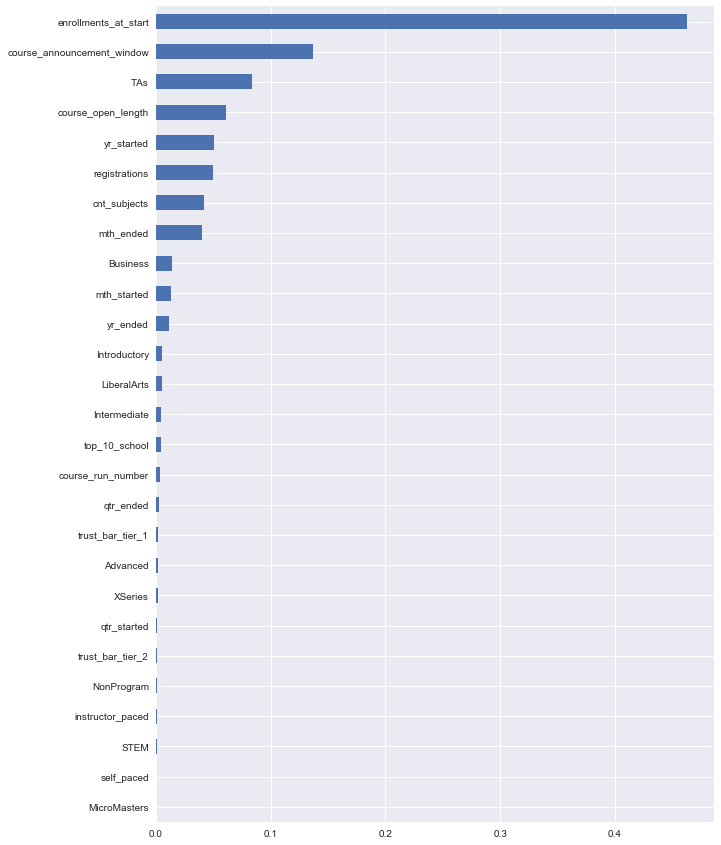

In [114]:
# Dispay the featured_cols (predictors of enrollment) in order of importance to the classifier
feature_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(10,15));

In [59]:
# Test out model on courses that haven't ended yet
new_query = """
SELECT
	a.course_id,
    LiberalArts,
    STEM,
    Business,
	cnt_subjects,
	is_WL,
	level_type,
	pacing_type,
	course_partner,
	CASE
		WHEN course_partner IN ('MITx', 'HarvardX', 'BerkeleyX', 'UTArlingtonX', 'UTAustinX', 'UTHealthSPHx', 'UTPermianBasin', 'UTSanAntonioX', 'UTMBx', 'UQx', 'DelftX') THEN 1 ELSE 0
	END AS trust_bar_tier_1,
	CASE
		WHEN course_partner IN ('BUx', 'SorbonneX', 'UBCx', 'USMx', 'GeorgetownX', 'AdelaideX') THEN 1 ELSE 0
	END AS trust_bar_tier_2,
	CASE
		WHEN course_partner IN ('RWTHx', 'ANUx') THEN 1 ELSE 0
	END AS trust_bar_tier_3,
	CASE
		WHEN course_partner IN ('MITx', 'HarvardX', 'BerkeleyX', 'CaltechX', 'OxfordX', 'ColumbiaX') THEN 1 ELSE 0
	END AS top_10_school,
	course_run_number,
	XSeries,
	ProfessionalCertificate,
	MicroMasters,
	NonProgram,
	audit_track,
	verified_track,
	professional_track,
	credit_track,
	cnt_available_tracks,
	YEAR(course_start_date) AS yr_started,
	QUARTER(course_start_date) AS qtr_started,
	MONTH(course_start_date) AS mth_started,
	DAYOFMONTH(course_start_date) AS day_of_month_started,
	DAYOFWEEK(course_start_date) AS day_of_week_started,
	YEAR(course_end_date) AS yr_ended,
	QUARTER(course_end_date) AS qtr_ended,
	MONTH(course_end_date) AS mth_ended,
	DAYOFMONTH(course_end_date) AS day_of_month_ended,
	DAYOFWEEK(course_end_date) AS day_of_week_ended,
	DATEDIFF(day, course_start_date, course_end_date) AS course_open_length,
	DATEDIFF(day, course_start_date, course_verification_end_date) AS course_verification_window,
    TAs,
    registrations,
	sum_enrolls,
	sum_enrolls/DATEDIFF(day, course_start_date, course_end_date) AS daily_enrollment_rate,
	sum_unenrolls/sum_enrolls AS pct_unenroll,
	sum_unenrolls,
	sum_unenrolls/DATEDIFF(day, course_start_date, course_end_date) AS daily_unenrollment_rate,
	sum_verifications,
	vtr,
	bookings_rank,
    bookings_per_course_rank,
	CAST(sum_bookings AS INT) AS sum_bookings
FROM
	ed_services.course_subjects a
LEFT JOIN
	business_intelligence.course_stats_summary b
ON
	a.course_id = b.course_id
LEFT JOIN
	business_intelligence.course_master c
ON
	a.course_id = c.course_id
LEFT JOIN
	ed_services.course_program d
ON
	a.course_id = d.course_id
LEFT JOIN
	ed_services.course_track e
ON
	a.course_id = e.course_id
LEFT JOIN
	ed_services.partner_rankings f
ON
	c.course_partner = f.org_id
LEFT JOIN
	ed_services.course_grouping g
ON
	a.course_id = g.course_id
LEFT JOIN
	ed_services.registrations h
ON
	YEAR(course_start_date) = h.yr
AND
	QUARTER(course_start_date) = h.qtr
AND
	MONTH(course_start_date) = h.mth
LEFT JOIN
	ed_services.course_staff i
ON
	a.course_id = i.course_id
WHERE
    course_end_date > GETDATE()
AND
    course_start_date < GETDATE();
"""

# Execute the Query from above
cur.execute(new_query)

# Dump the query results into a Pandas DataFrame
new_course_data = pd.DataFrame(cur.fetchall())

In [60]:
new_course_data['course_verification_window'] = new_course_data['course_verification_window'].fillna(new_course_data['course_verification_window'].median())
new_course_data['sum_bookings'] = new_course_data['sum_bookings'].fillna(new_course_data['sum_bookings'].mean())
new_course_data['TAs'] = new_course_data['TAs'].fillna(new_course_data['TAs'].median())

new_course_data['High Performing Course'] = (new_course_data.sum_enrolls > course_data['sum_enrolls'].quantile(.66)).astype(int)
#new_course_data['High Performing Course'] = (new_course_data.sum_bookings > new_course_data['sum_bookings'].median()).astype(int)


new_course_data = pd.concat([new_course_data, pd.get_dummies(new_course_data['pacing_type'])], axis=1)
new_course_data = pd.concat([new_course_data, pd.get_dummies(new_course_data['level_type'])], axis=1)

In [42]:
X_new = new_course_data[feature_cols]

new_course_data['Predictions'] = gbc.predict(X_new)

In [43]:
print metrics.confusion_matrix(new_course_data['High Performing Course'], new_course_data['Predictions'])
print metrics.classification_report(new_course_data['High Performing Course'], new_course_data['Predictions'])

[[418  54]
 [ 82  39]]
             precision    recall  f1-score   support

          0       0.84      0.89      0.86       472
          1       0.42      0.32      0.36       121

avg / total       0.75      0.77      0.76       593



In [44]:
display_cols = ['course_id', 'sum_enrolls', 'Predictions', 'High Performing Course']

new_course_data[display_cols]

course_id  sum_enrolls  \
0                    course-v1:ANUx+ANU-ASTRO1x+2T2016        23182   
1                    course-v1:ANUx+ANU-ASTRO2x+2T2016        18381   
2                    course-v1:ANUx+ANU-ASTRO3x+1T2016        13533   
3                    course-v1:ANUx+ANU-ASTRO4x+2T2016         9683   
4                 course-v1:ANUx+ANU-ActuarialX+1T2016        17278   
5                         course-v1:ANUx+EBM01x+1T2017         7530   
6                         course-v1:ANUx+EBM02x+2T2017         3389   
7                        course-v1:ASUx+GBL500x+3T2016         3036   
8                       course-v1:ASUx+GFADemox+1T2016         4181   
9                        course-v1:ASUx+MAT117x+1T2016        52414   
10                       course-v1:ASUx+MAT170x+2T2017         4856   
11                       course-v1:ASUx+TGM505x+2T2017         4254   
12                       course-v1:ASUx+TGM540x+2T2017         2361   
13               course-v1:AdelaideX+AddictionX+3T2016         3305   
14                 course-v1:AdelaideX+Code101x+1T2017         1632   
15                course-v1:AdelaideX+Cyber101x+1T2016        23590   
16                 course-v1:AdelaideX+Lang101x+3T2016         2192   
17              course-v1:AdelaideX+Project101x+1T2017        17808   
18                 course-v1:AdelaideX+Wine101x+2T2016        11515   
19     course-v1:AmnestyInternationalX+Rights2x+3T2016        46027   
20   course-v1:AmnestyInternationalX+Rights2xES+3T2016        10634   
21   course-v1:AmnestyInternationalX+Rights2xFR+3T2016         6947   
22                           course-v1:BAx+BAx4+2T2017          163   
23                    course-v1:BUx+ComplianceX+4T2015          173   
24                  course-v1:BUx+GlobalHealthX+1T2017         1920   
25                     course-v1:BUx+Math226.1x+2T2017         1386   
26                course-v1:BabsonX+BPET.ACCx+1T2017_2         1563   
27                course-v1:BabsonX+BPET.ETAx+1T2017_2         2969   
28                  course-v1:BabsonX+BPET.FINx+2T2017         3969   
29                 course-v1:BabsonX+BPET.STATx+2T2017         3300   
..                                                 ...          ...   
563      course-v1:University_of_TorontoX+HPT3x+2T2016         1212   
564    course-v1:University_of_TorontoX+INQ101x+3T2016         1437   
565                         course-v1:VJx+VJx_2+3T2016         6173   
566                       course-v1:W3Cx+CSS.0x+1T2017         4808   
567                     course-v1:W3Cx+HTML5.0x+1T2017        17419   
568                     course-v1:W3Cx+HTML5.1x+1T2017         6622   
569                        course-v1:W3Cx+JS.0x+1T2017         7255   
570                course-v1:WageningenX+AB101x+1T2017         3720   
571                 course-v1:WageningenX+BB01x+1T2017         5632   
572                 course-v1:WageningenX+BB02x+1T2017         2934   
573                 course-v1:WageningenX+BB03x+2T2017         2820   
574                 course-v1:WageningenX+FFESx+1T2017         5152   
575                course-v1:WageningenX+FSSFAx+2T2017         1192   
576                 course-v1:WageningenX+GFFCx+2T2016         5680   
577              course-v1:WageningenX+NUTR101x+2T2017         1812   
578              course-v1:WageningenX+NUTR102x+2T2017         1442   
579               course-v1:WageningenX+NUTR103+2T2017         1041   
580                 course-v1:WageningenX+Soilx+3T2016         4232   
581                   course-v1:WasedaX+JPC111x+1T2017         2889   
582       course-v1:Wharton+CustomerCentricityx+2T2017           66   
583      course-v1:Wharton+DigitalMarketing1.1x+2T2017          161   
584    course-v1:Wharton+MarketingAnalytics101x+2T2017           52   
585          course-v1:Wharton+SellingIdeas101x+2T2017           38   
586                 course-v1:Wharton+StrategyX+2T2017           76   
587                    course-v1:WitsX+RBME101x+1T2017         2647  

In [45]:
# Create feature columns which will be used as factors to determine [y]
feature_cols = ['LiberalArts',
                'STEM',
                'Business',
                'cnt_subjects',
                'Advanced',
                'Intermediate',
                'Introductory',
                'self_paced',
                'instructor_paced',
                'course_run_number',
                'XSeries',
                #'ProfessionalCertificate',
                'MicroMasters',
                'NonProgram',
                'cnt_available_tracks',
                'yr_started',
                'qtr_started',
                'mth_started',
                'yr_ended',
                'qtr_ended',
                'mth_ended',
                'course_open_length',
                'course_verification_window',
                'trust_bar_tier_1',
                'trust_bar_tier_2',
                #'trust_bar_tier_3',
                'top_10_school',
                'bookings_per_course_rank',
                'registrations',
                'TAs'
                ]


X = course_data[feature_cols]
# y for classification
#y = course_data['High Performing Course']
# y for regressor
y = course_data['sum_enrolls']
# For classification of 3 categories
#y = course_data['bookings_cat']

In [46]:
# Split the data into testing and training for above average bookings classification
X_train, X_test, y_train, y_test = train_test_split(course_data[feature_cols], course_data['sum_enrolls'], test_size=0.20, random_state=42)

In [47]:
# Using the TPOT classifier to figure out the best model to use
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=10, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: 163210900.586


Generation 2 - Current best internal CV score: 163210900.586


Generation 3 - Current best internal CV score: 163210900.586


Generation 4 - Current best internal CV score: 163210900.586


Generation 5 - Current best internal CV score: 162766262.539


Generation 6 - Current best internal CV score: 162745849.483


Generation 7 - Current best internal CV score: 162628066.976


Generation 8 - Current best internal CV score: 160159796.329


Generation 9 - Current best internal CV score: 160159796.329


Generation 10 - Current best internal CV score: 160159796.329



Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=DEFAULT, RandomForestRegressor__max_features=0.5, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=DEFAULT, RandomForestRegressor__n_estimators=100)
70414422.0512


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV

rf_regressor = RandomForestRegressor(max_features=.5, min_samples_leaf=4)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
predictions = tpot.predict(X_test)
tpot.score(X_test, y_test)

70414422.051196739

In [61]:
X_new = new_course_data[feature_cols]

new_course_data['Predictions'] = tpot.predict(X_new)

In [63]:
display_cols = ['course_id', 'sum_enrolls', 'Predictions', 'High Performing Course']

new_course_data[display_cols]

course_id  sum_enrolls  \
0                    course-v1:ANUx+ANU-ASTRO1x+2T2016        23182   
1                    course-v1:ANUx+ANU-ASTRO2x+2T2016        18381   
2                    course-v1:ANUx+ANU-ASTRO3x+1T2016        13533   
3                    course-v1:ANUx+ANU-ASTRO4x+2T2016         9683   
4                 course-v1:ANUx+ANU-ActuarialX+1T2016        17278   
5                         course-v1:ANUx+EBM01x+1T2017         7530   
6                         course-v1:ANUx+EBM02x+2T2017         3389   
7                        course-v1:ASUx+GBL500x+3T2016         3036   
8                       course-v1:ASUx+GFADemox+1T2016         4181   
9                        course-v1:ASUx+MAT117x+1T2016        52414   
10                       course-v1:ASUx+MAT170x+2T2017         4856   
11                       course-v1:ASUx+TGM505x+2T2017         4254   
12                       course-v1:ASUx+TGM540x+2T2017         2361   
13               course-v1:AdelaideX+AddictionX+3T2016         3305   
14                 course-v1:AdelaideX+Code101x+1T2017         1632   
15                course-v1:AdelaideX+Cyber101x+1T2016        23590   
16                 course-v1:AdelaideX+Lang101x+3T2016         2192   
17              course-v1:AdelaideX+Project101x+1T2017        17808   
18                 course-v1:AdelaideX+Wine101x+2T2016        11515   
19     course-v1:AmnestyInternationalX+Rights2x+3T2016        46027   
20   course-v1:AmnestyInternationalX+Rights2xES+3T2016        10634   
21   course-v1:AmnestyInternationalX+Rights2xFR+3T2016         6947   
22                           course-v1:BAx+BAx4+2T2017          163   
23                    course-v1:BUx+ComplianceX+4T2015          173   
24                  course-v1:BUx+GlobalHealthX+1T2017         1920   
25                     course-v1:BUx+Math226.1x+2T2017         1386   
26                course-v1:BabsonX+BPET.ACCx+1T2017_2         1563   
27                course-v1:BabsonX+BPET.ETAx+1T2017_2         2969   
28                  course-v1:BabsonX+BPET.FINx+2T2017         3969   
29                 course-v1:BabsonX+BPET.STATx+2T2017         3300   
..                                                 ...          ...   
563      course-v1:University_of_TorontoX+HPT3x+2T2016         1212   
564    course-v1:University_of_TorontoX+INQ101x+3T2016         1437   
565                         course-v1:VJx+VJx_2+3T2016         6173   
566                       course-v1:W3Cx+CSS.0x+1T2017         4808   
567                     course-v1:W3Cx+HTML5.0x+1T2017        17419   
568                     course-v1:W3Cx+HTML5.1x+1T2017         6622   
569                        course-v1:W3Cx+JS.0x+1T2017         7255   
570                course-v1:WageningenX+AB101x+1T2017         3720   
571                 course-v1:WageningenX+BB01x+1T2017         5632   
572                 course-v1:WageningenX+BB02x+1T2017         2934   
573                 course-v1:WageningenX+BB03x+2T2017         2820   
574                 course-v1:WageningenX+FFESx+1T2017         5152   
575                course-v1:WageningenX+FSSFAx+2T2017         1192   
576                 course-v1:WageningenX+GFFCx+2T2016         5680   
577              course-v1:WageningenX+NUTR101x+2T2017         1812   
578              course-v1:WageningenX+NUTR102x+2T2017         1442   
579               course-v1:WageningenX+NUTR103+2T2017         1041   
580                 course-v1:WageningenX+Soilx+3T2016         4232   
581                   course-v1:WasedaX+JPC111x+1T2017         2889   
582       course-v1:Wharton+CustomerCentricityx+2T2017           66   
583      course-v1:Wharton+DigitalMarketing1.1x+2T2017          161   
584    course-v1:Wharton+MarketingAnalytics101x+2T2017           52   
585          course-v1:Wharton+SellingIdeas101x+2T2017           38   
586                 course-v1:Wharton+StrategyX+2T2017           76   
587                    course-v1:WitsX+RBME101x+1T2017         2647  

# Let's try Splitting up Pacing Type since we know those behavior a little differently

In [138]:
self_paced = course_data[course_data['pacing_type'] == 'self_paced']
instructor_paced = course_data[course_data['pacing_type'] == 'instructor_paced']

In [148]:
# Create feature columns which will be used as factors to determine [y]
feature_cols = ['LiberalArts',
                'STEM',
                'Business',
                'cnt_subjects',
                'Advanced',
                'Intermediate',
                'Introductory',
                #'self_paced',
                #'instructor_paced',
                'course_run_number',
                'XSeries',
                #'ProfessionalCertificate',
                'MicroMasters',
                'NonProgram',
                #'cnt_available_tracks',
                'yr_started',
                'qtr_started',
                'mth_started',
                'yr_ended',
                'qtr_ended',
                'mth_ended',
                'course_open_length',
                #'course_verification_window',
                'trust_bar_tier_1',
                'trust_bar_tier_2',
                #'trust_bar_tier_3',
                'top_10_school',
                #'bookings_per_course_rank',
                'registrations',
                'TAs',
                'course_announcement_window',
                #'enrollments_at_start'
                ]


X = self_paced[feature_cols]
#X = instructor_led[feature_cols]
# y for classification
#y = self_paced['High Performing Course']
y = instructor_paced['High Performing Course']

In [147]:
self_paced['High Performing Course'] = (self_paced.sum_enrolls > self_paced['sum_enrolls'].quantile(.66)).astype(int)
instructor_paced['High Performing Course'] = (instructor_paced.sum_enrolls > instructor_paced['sum_enrolls'].quantile(.66)).astype(int)

In [149]:
# Split the data into testing and training for high performing enrollments classification
X_train, X_test, y_train, y_test = train_test_split(instructor_paced[feature_cols], instructor_paced['High Performing Course'], test_size=0.20, random_state=42)

In [151]:
# Using the TPOT classifier to figure out the best model to use for self paced enrollment prediction
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=10, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.734375520858


Generation 2 - Current best internal CV score: 0.734375520858


Generation 3 - Current best internal CV score: 0.739000581788


Generation 4 - Current best internal CV score: 0.750655848546


Generation 5 - Current best internal CV score: 0.75079076057


Generation 6 - Current best internal CV score: 0.75079076057


Generation 7 - Current best internal CV score: 0.75079076057


Generation 8 - Current best internal CV score: 0.75079076057


Generation 9 - Current best internal CV score: 0.75079076057


Generation 10 - Current best internal CV score: 0.75079076057



Best pipeline: RandomForestClassifier(PCA(input_matrix, PCA__iterated_power=2, PCA__svd_solver=DEFAULT), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=DEFAULT, RandomForestClassifier__max_features=0.85, RandomForestClassifier__min_samples_leaf=3, RandomForestClassifier__min_samples_split=14, RandomForestClassifier__n_estimators=100)
0.777777777778


In [150]:
# Self Paced
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=7, max_features=0.25, min_samples_leaf=7, min_samples_split=15, subsample=0.75)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=7,
              max_features=0.25, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=7,
              min_samples_split=15, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=0.75, verbose=0, warm_start=False)

In [152]:
# Instructor Paced
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, max_features=0.85, min_samples_leaf=3, min_samples_split=14, n_estimators=100)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.85, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=14, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [153]:
predictions = rf.predict(X_test)

print metrics.confusion_matrix(y_test, predictions)
print metrics.classification_report(y_test, predictions)
print rf.score(X_test, y_test)

[[63 15]
 [ 9 21]]
             precision    recall  f1-score   support

          0       0.88      0.81      0.84        78
          1       0.58      0.70      0.64        30

avg / total       0.79      0.78      0.78       108

0.777777777778


In [135]:
predictions = gbc.predict(X_test)
prediction_probability = gbc.predict_proba(X_test)

print metrics.confusion_matrix(y_test, predictions)
print metrics.classification_report(y_test, predictions)
print gbc.score(X_test, y_test)

[[3 4]
 [4 2]]
             precision    recall  f1-score   support

          0       0.43      0.43      0.43         7
          1       0.33      0.33      0.33         6

avg / total       0.38      0.38      0.38        13

0.384615384615


In [146]:
# Not a huge sample size for self paced since not a lot of self paced courses have ended
self_paced.count()

course_id                     65
cnt_subjects                  65
LiberalArts                   65
STEM                          65
Business                      65
is_WL                         65
level_type                    65
pacing_type                   65
course_partner                65
trust_bar_tier_1              65
trust_bar_tier_2              65
trust_bar_tier_3              65
top_10_school                 65
course_run_number             65
XSeries                       65
ProfessionalCertificate       65
MicroMasters                  65
NonProgram                    65
audit_track                   65
verified_track                65
professional_track            65
credit_track                  65
cnt_available_tracks          65
yr_started                    65
qtr_started                   65
mth_started                   65
day_of_month_started          65
day_of_week_started           65
yr_ended                      65
qtr_ended                     65
mth_ended 